In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicted-data/predictions.csv
/kaggle/input/fitbit-cleaned-data/cleaned_data.xlsx


In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fitbit_data = pd.read_excel('/kaggle/input/fitbit-cleaned-data/cleaned_data.xlsx')
score_data = pd.read_csv('/kaggle/input/predicted-data/predictions.csv')

In [4]:
# data columns
print(fitbit_data.head())

                         id  nightly_temperature  nremhr    rmssd  \
0  621e2e8e67b776a24055b564            33.794544  57.681   94.303   
1  621e2e8e67b776a24055b564            34.611011  57.481  119.212   
2  621e2e8e67b776a24055b564            34.408304  57.493  111.709   
3  621e2e8e67b776a24055b564            34.178922  56.750  103.034   
4  621e2e8e67b776a24055b564            34.610929  57.314   89.941   

   full_sleep_breathing_rate  stress_score  sleep_points_percentage  \
0                       15.8          80.0                 0.833333   
1                       14.6          84.0                 0.966667   
2                       14.8          82.0                 0.933333   
3                       15.2          81.0                 0.866667   
4                       14.8          82.0                 0.900000   

   exertion_points_percentage  responsiveness_points_percentage  \
0                       0.725                          0.866667   
1                       

In [5]:
# Describe
print(fitbit_data.describe())

       nightly_temperature       nremhr        rmssd  \
count          2092.000000  2092.000000  2092.000000   
mean             33.685102    61.063776    41.811103   
std               1.300064     8.425085    16.951778   
min              26.121519     0.000000     0.000000   
25%              33.351797    57.600250    30.809654   
50%              33.892284    61.063776    41.811103   
75%              34.342854    64.871000    44.110000   
max              36.684793    87.345000   122.089000   

       full_sleep_breathing_rate  stress_score  sleep_points_percentage  \
count                2092.000000   2092.000000              2092.000000   
mean                   14.409223     64.412718                 0.658729   
std                     2.440193     20.094507                 0.216041   
min                     0.000000      0.000000                 0.000000   
25%                    13.800000     64.412718                 0.658729   
50%                    14.409223     64.41271

In [6]:
# null values
print(fitbit_data.isnull().sum())

id                                  0
nightly_temperature                 0
nremhr                              0
rmssd                               0
full_sleep_breathing_rate           0
stress_score                        0
sleep_points_percentage             0
exertion_points_percentage          0
responsiveness_points_percentage    0
daily_temperature_variation         0
calories                            0
filteredDemographicVO2Max           0
distance                            0
bpm                                 0
lightly_active_minutes              0
moderately_active_minutes           0
very_active_minutes                 0
sedentary_minutes                   0
mindfulness_session                 0
resting_hr                          0
sleep_duration                      0
minutesToFallAsleep                 0
minutesAsleep                       0
minutesAwake                        0
minutesAfterWakeup                  0
sleep_efficiency                    0
sleep_deep_r

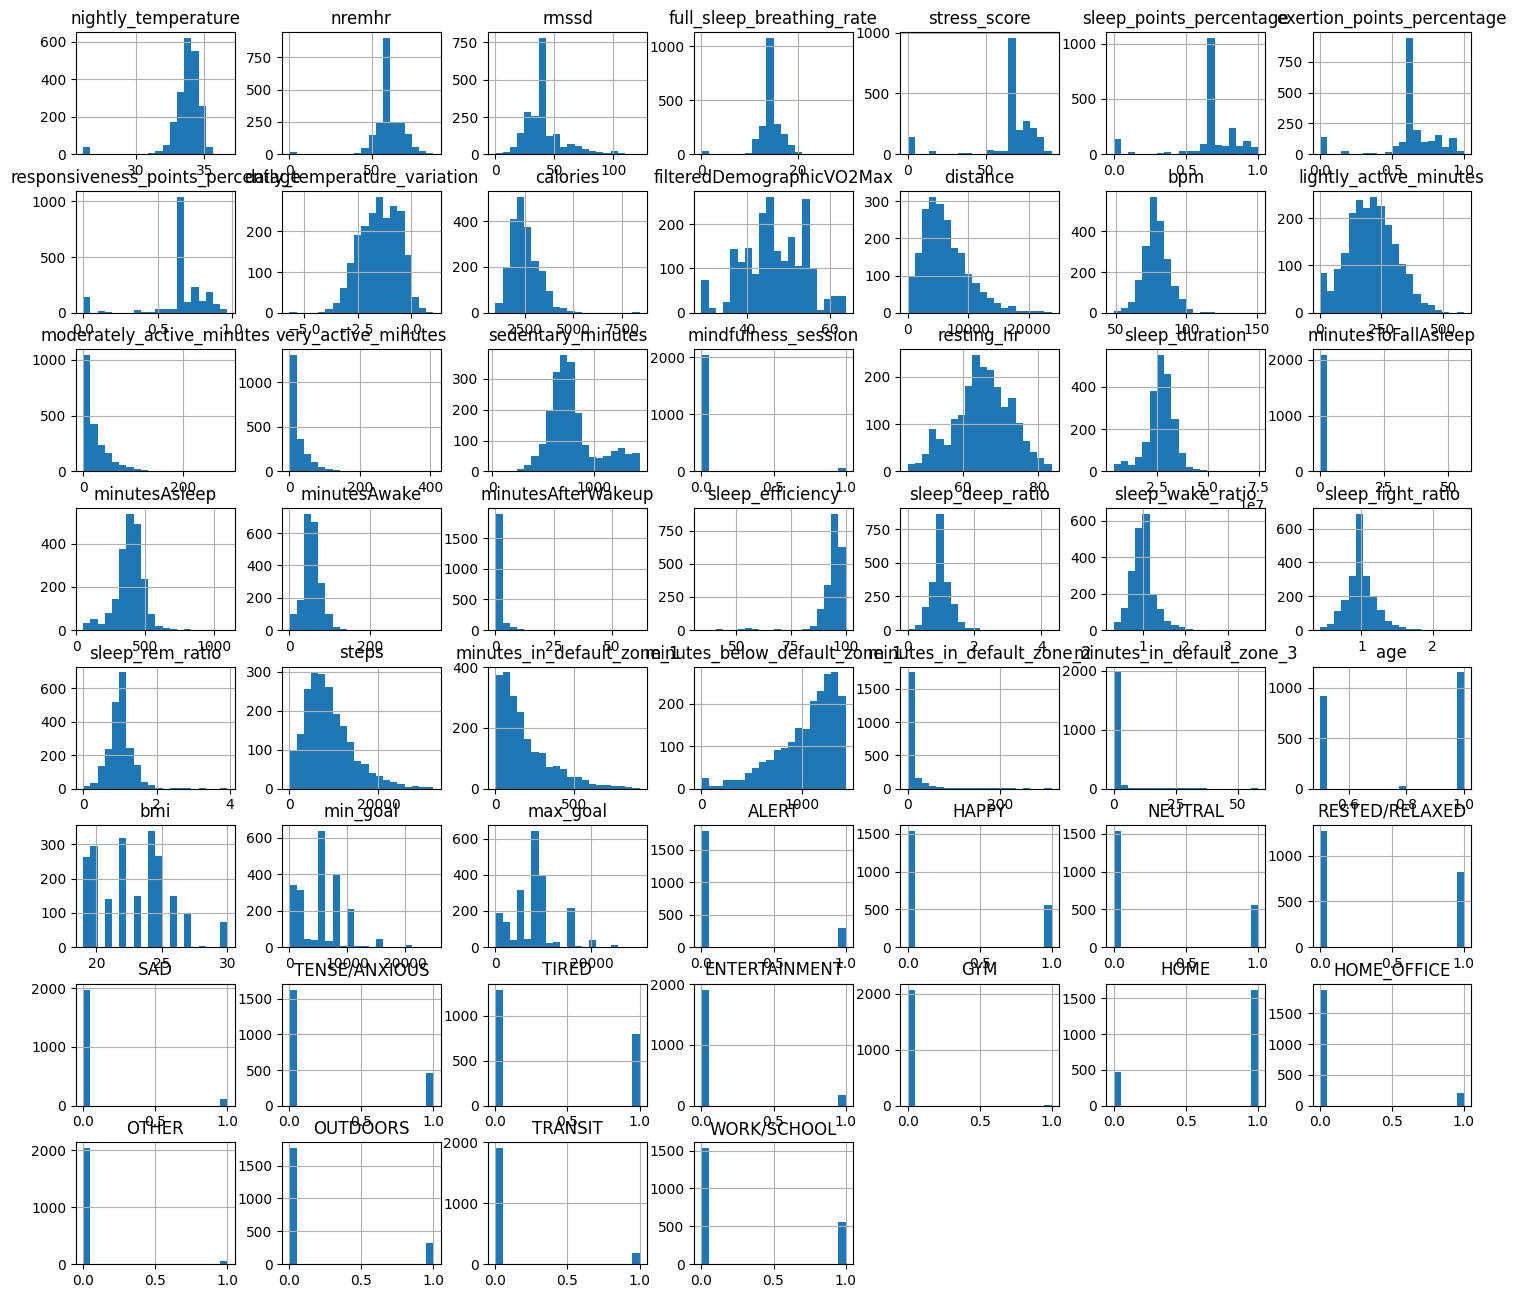

In [7]:
fitbit_data.hist(figsize=(18, 16), bins=20)
plt.show()

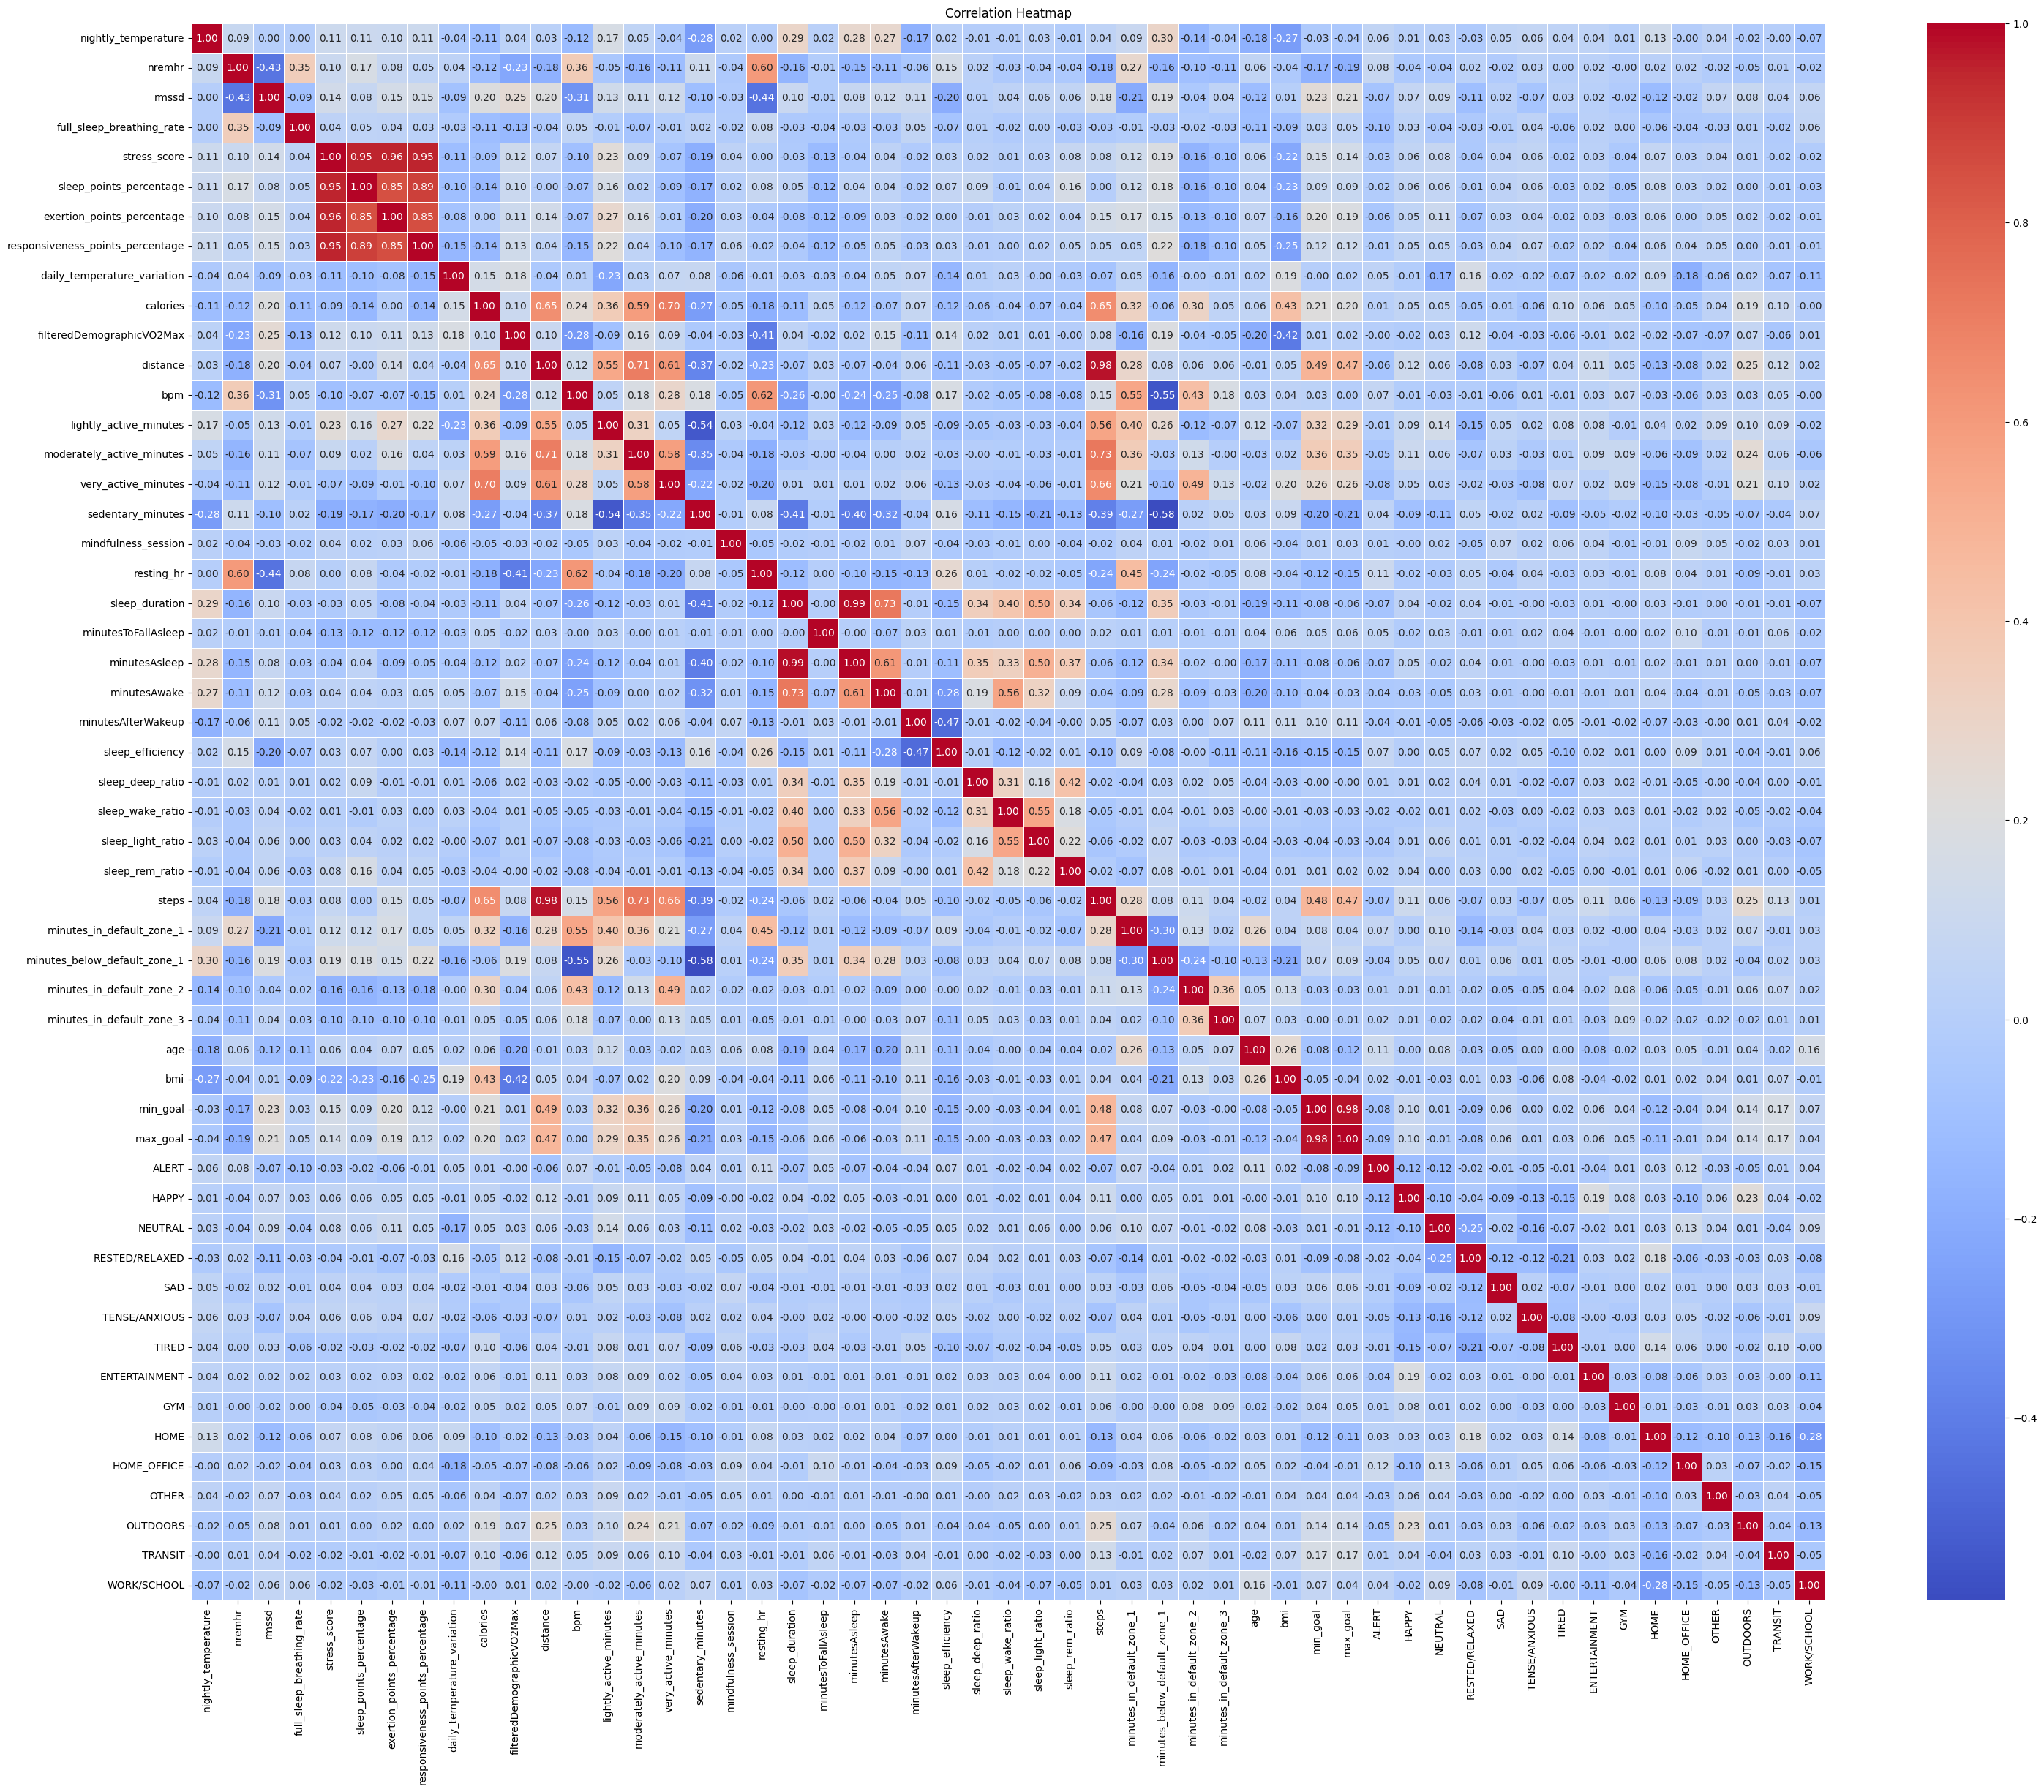

In [8]:
numeric_columns = fitbit_data.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(36, 28))

# heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

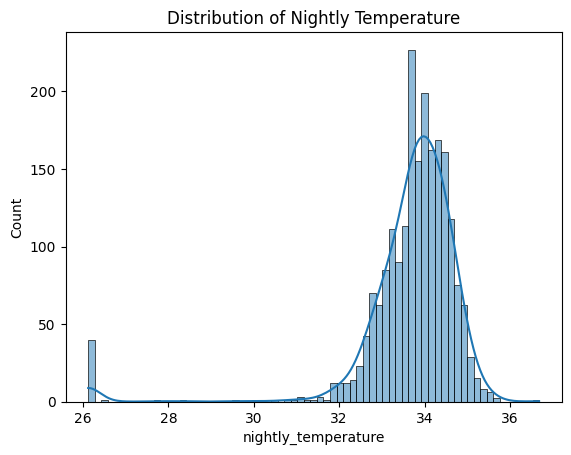

In [9]:
sns.histplot(fitbit_data['nightly_temperature'], kde=True)
plt.title('Distribution of Nightly Temperature')
plt.show()

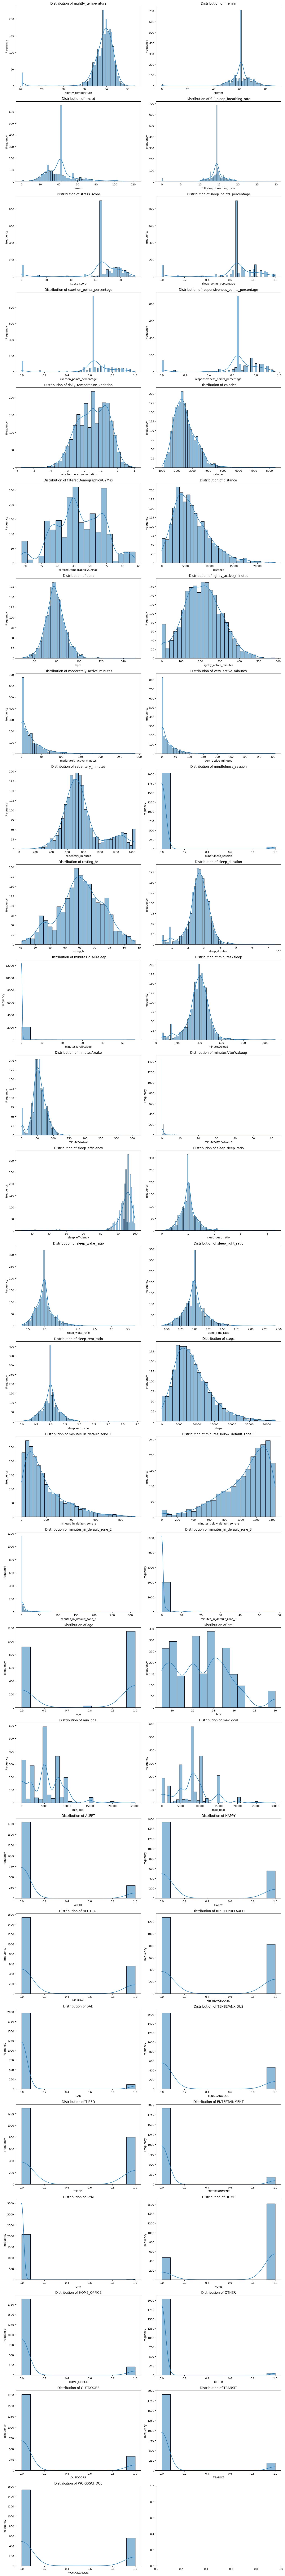

In [10]:
numerical_columns = fitbit_data.select_dtypes(include=['float64', 'int64']).columns

num_cols = 2

# Cal. the no. of rows needed
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    sns.histplot(fitbit_data[column], kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

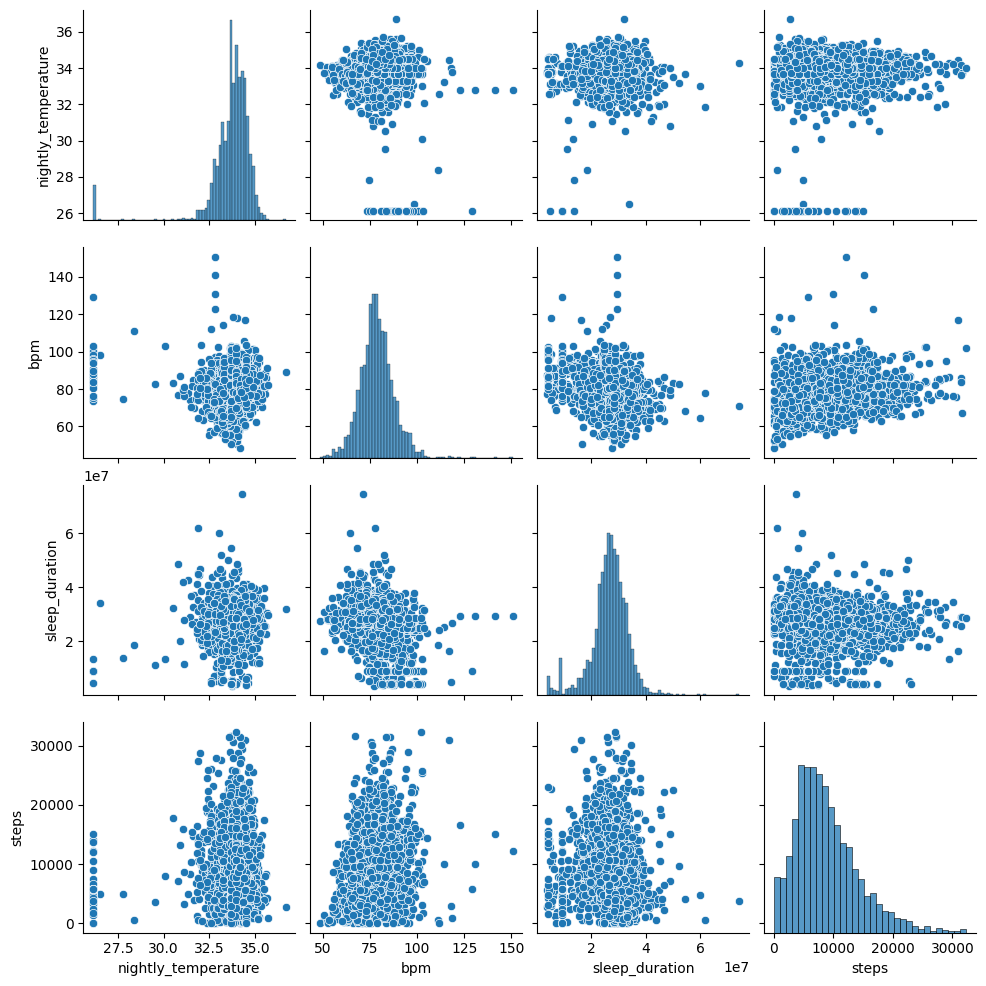

In [11]:
sns.pairplot(fitbit_data[['nightly_temperature', 'bpm', 'sleep_duration', 'steps']])
plt.show()

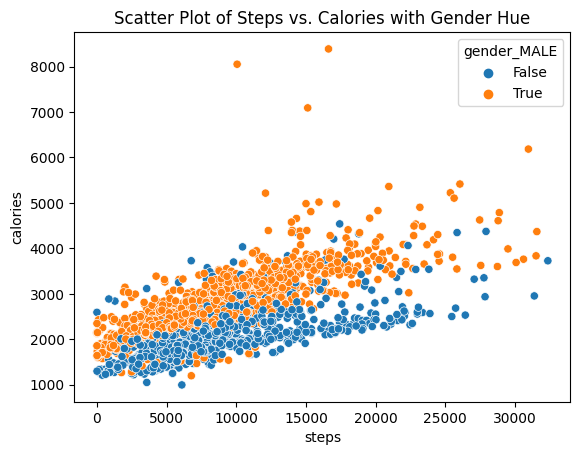

In [12]:
sns.scatterplot(x='steps', y='calories', hue='gender_MALE', data=fitbit_data)
plt.title('Scatter Plot of Steps vs. Calories with Gender Hue')
plt.show()

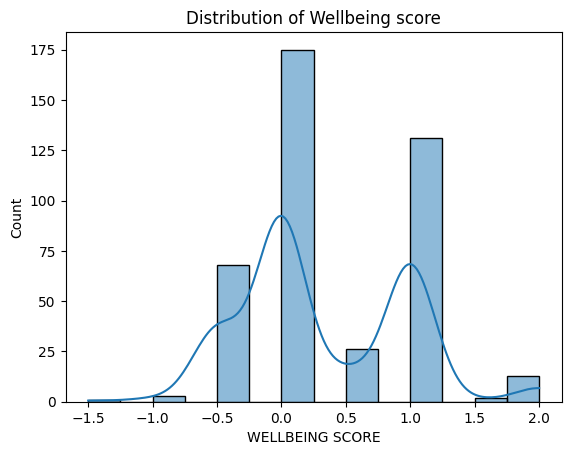

In [13]:
sns.histplot(score_data['WELLBEING SCORE'], kde=True)
plt.title('Distribution of Wellbeing score')
plt.show()